# Loading the Dataset

In [2]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import requests, zipfile, io
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

url = "https://github.com/devtlv/Datasets-DA-Bootcamp-2-/raw/refs/heads/main/Week%204%20-%20Data%20Understanding/W4D4%20-%20Data%20Preprocessing%20&%20T/Data%20Science%20Job%20Salary%20dataset.zip"
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("data")

In [3]:
salary_data = pd.read_csv('./data/Data Science Job Salary dataset/datascience_salaries.csv')
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1171 non-null   int64 
 1   job_title         1171 non-null   object
 2   job_type          1171 non-null   object
 3   experience_level  1171 non-null   object
 4   location          1171 non-null   object
 5   salary_currency   1171 non-null   object
 6   salary            1171 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 64.2+ KB


In [4]:
salary_data.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000


# Normalizing Salary Column

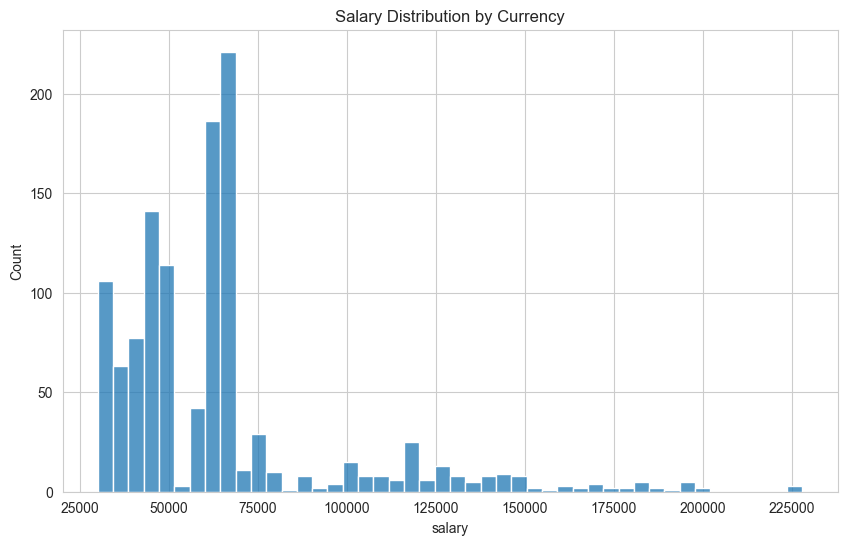

In [5]:
# Visualizing the Data
plt.figure(figsize=(10,6))
sns.histplot(salary_data['salary'])
plt.title("Salary Distribution by Currency")
plt.show()

In [6]:
# Handling Outliers via IQR Method
Q1 = salary_data['salary'].quantile(0.25)
Q3 = salary_data['salary'].quantile(0.75)
IQR = Q3 - Q1

# Determing Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing Outliers
salary_data = salary_data[(salary_data['salary'] >= lower_bound) & (salary_data['salary'] <= upper_bound)]
salary_data.shape

(1032, 7)

<function matplotlib.pyplot.show(close=None, block=None)>

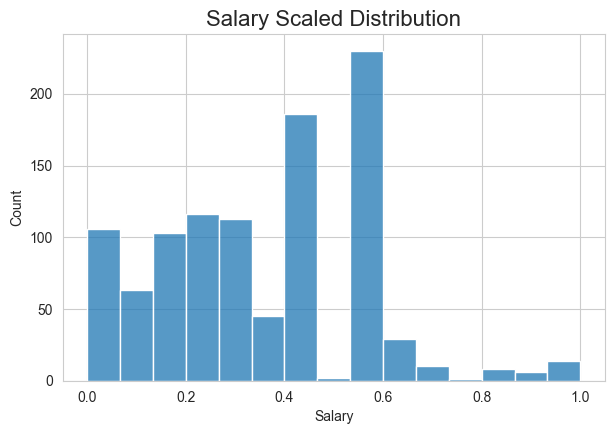

In [7]:
# Normalization Using MinMaxScaler
scaler_mm = MinMaxScaler()
salary_data['salary_normalized'] = scaler_mm.fit_transform(salary_data[['salary']])

plt.figure(figsize=(7,4.5))
sns.histplot(salary_data['salary_normalized'])
plt.title('Salary Scaled Distribution', size=16)
plt.xlabel('Salary', size=10)
plt.show

# Dimensionality Reduction

In [8]:
# Dimensionality Using PCA
pca = PCA(n_components=2)
salary_data_numeric = salary_data.select_dtypes(include=['int64', 'float64'])

reduced_data = pca.fit_transform(salary_data_numeric)

In [ ]:
# Previewing the PCA
reduced_df = pd.DataFrame(
    reduced_data,
    columns=['PC1', 'PC2']  # name the components
)

reduced_df.head()

,PC1,PC2
0,13274.061256,-846.546341
1,13274.045329,-843.546384
2,14274.025927,-837.237369
3,13274.034711,-841.546412
4,13274.024093,-839.546440


# Aggregating Data

In [ ]:
# Group the dataset by the ‘experience_level’ column and calculate the average and median salary for each experience level
salary_experience = salary_data.groupby('experience_level')['salary'].agg(['mean', 'median'])
print(salary_experience)


                          mean   median
experience_level                       
Entry             33902.439024  30000.0
Executive         48111.111111  46000.0
Mid               48109.965636  50000.0
Senior            62198.686371  63000.0
